In [3]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run
import pandas as pd

2024-02-13 21:57:53,517: Logging to /Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/initial_exploration/runs/exploration_run_1302_215753/output.log initialized.
2024-02-13 21:57:53,518: ### Folder structure created at /Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/initial_exploration/runs/exploration_run_1302_215753
2024-02-13 21:57:53,518: ### Run configurations for exploration_run
2024-02-13 21:57:53,519: experiment_name: exploration_run
2024-02-13 21:57:53,520: train_basin_file: exploration_tuler
2024-02-13 21:57:53,520: validation_basin_file: exploration_tuler
2024-02-13 21:57:53,520: test_basin_file: exploration_tuler
2024-02-13 21:57:53,521: train_start_date: 1982-10-01 00:00:00
2024-02-13 21:57:53,521: train_end_date: 1990-09-30 00:00:00
2024-02-13 21:57:53,522: validation_start_date: 1901-10-01 00:00:00
2024-02-13 21:57:53,522: validation_end_date: 2000-09-30 00:00:00
2024-02-13 21:57:53,522: test_start_date: 2001-10-01 00:00:00
2024-02-13 21:57:53,523: test_end_date: 

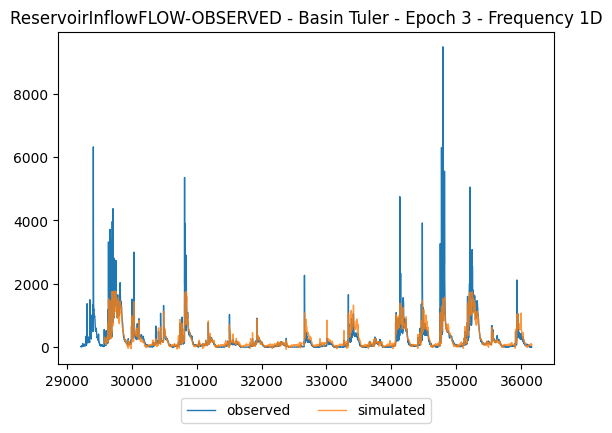

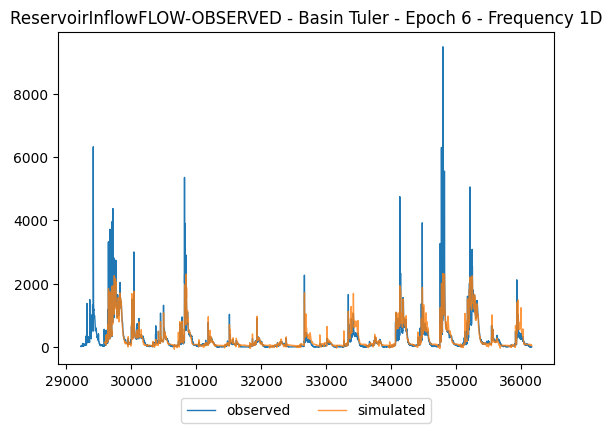

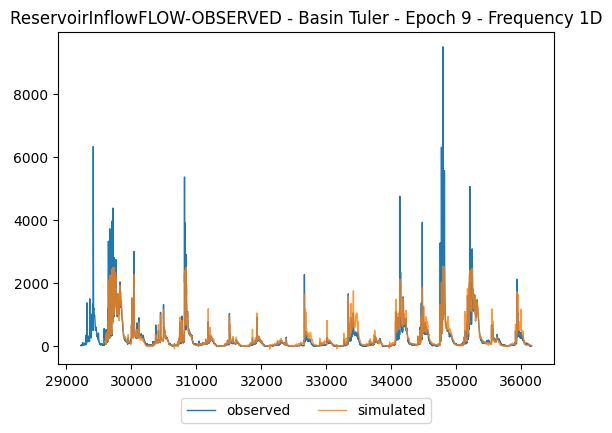

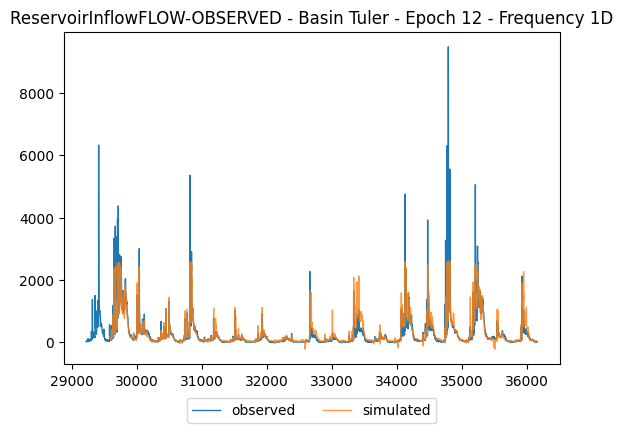

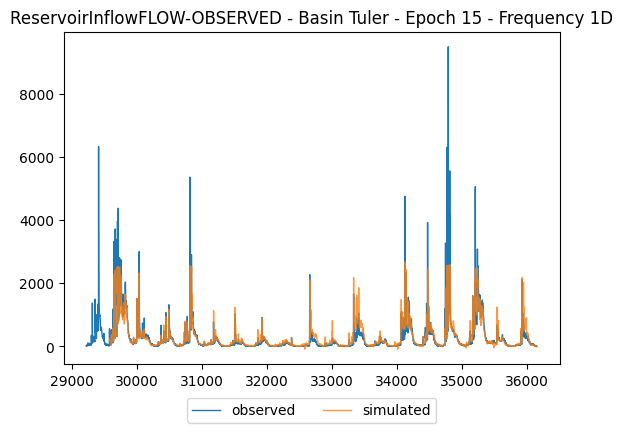

In [5]:
start_run(config_file=Path("1_basin.yml"), gpu=-1)

Evaluate on test set

In [8]:
# change directory to directory specified by above cell

run_dir = Path("runs/exploration_run_1302_215753")
eval_run(run_dir=run_dir, period="test")



2024-02-13 22:02:25,434: Using the model weights from runs/exploration_run_1302_215753/model_epoch015.pt
# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
2024-02-13 22:02:25,809: Stored metrics at runs/exploration_run_1302_215753/test/model_epoch015/test_metrics.csv
2024-02-13 22:02:25,810: Stored results at runs/exploration_run_1302_215753/test/model_epoch015/test_results.p


Load and inspect model predictions

In [10]:
with open(run_dir / "test" / "model_epoch015" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results.keys()

dict_keys(['Tuler'])

In [11]:
results['Tuler']['1D']['xr']

<xarray.Dataset>
Dimensions:                           (date: 1461, time_step: 1)
Coordinates:
  * date                              (date) datetime64[ns] 2001-10-01 ... 20...
  * time_step                         (time_step) int64 0
Data variables:
    ReservoirInflowFLOW-OBSERVED_obs  (date, time_step) float32 3.2 1.1 ... 20.1
    ReservoirInflowFLOW-OBSERVED_sim  (date, time_step) float32 -3.517 ... 0.146

In [12]:
#get output from physical model to plot with LSTM output

df = pd.read_csv('/Users/evanrobert/Documents/ESDL_Research/Training_Data_3_Basins/HMS_inflow_results_data.csv')

physical_data = df[['Date', 'ReservoirInflowFLOW']]
physical_data["Date"] = pd.to_datetime(physical_data["Date"])

start_date = '2001-10-01'
end_date = '2005-09-30'

# Filter the DataFrame to keep only the dates within the specified range
physical_data = physical_data[(physical_data['Date'] >= start_date) & (physical_data['Date'] <= end_date)]

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_7589/4074461200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_data["Date"] = pd.to_datetime(physical_data["Date"])


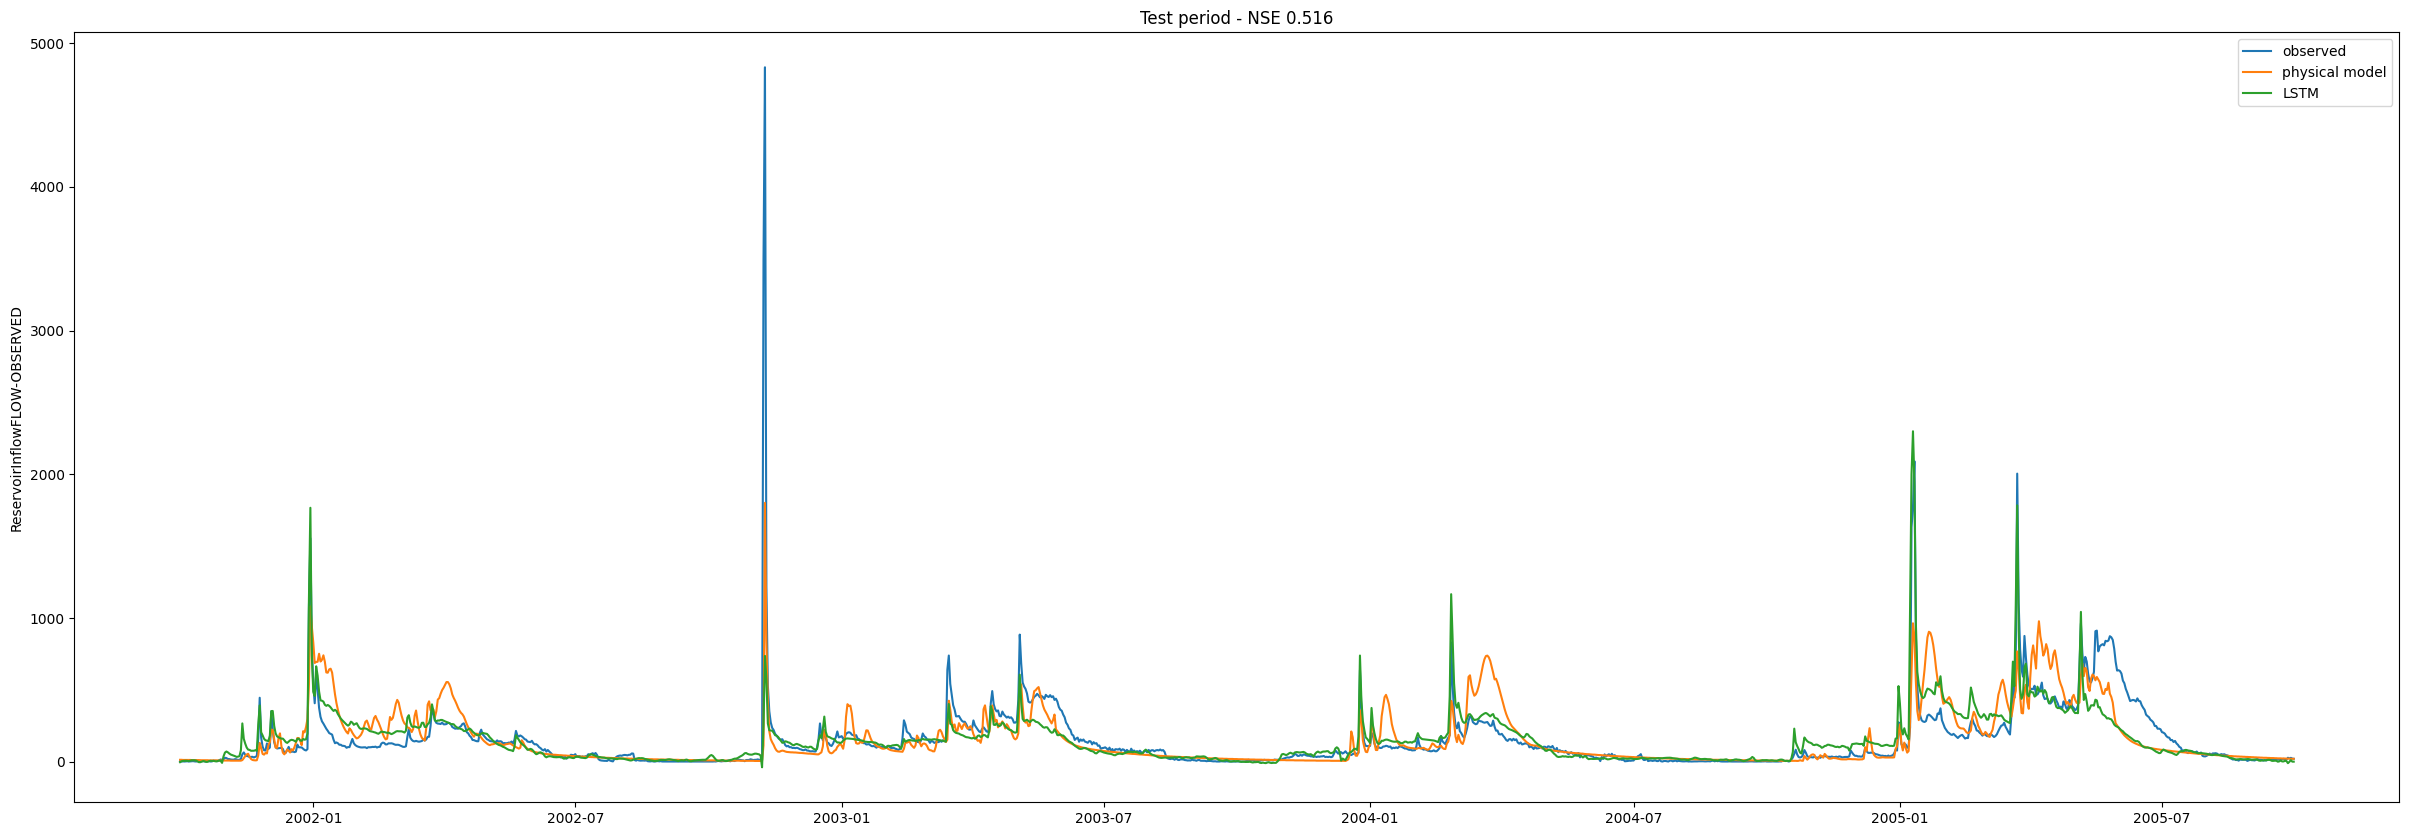

In [13]:
# extract observations and LSTM simulations
qobs = results['Tuler']['1D']['xr']['ReservoirInflowFLOW-OBSERVED_obs']
qsim = results['Tuler']['1D']['xr']['ReservoirInflowFLOW-OBSERVED_sim']

fig, ax = plt.subplots(figsize=(30,10))
ax.plot(physical_data["Date"], qobs, label = "observed")
ax.plot(physical_data["Date"], physical_data['ReservoirInflowFLOW'], label= "physical model")
ax.plot(physical_data["Date"], qsim, label = "LSTM")
ax.set_ylabel("ReservoirInflowFLOW-OBSERVED")
ax.set_title(f"Test period - NSE {results['Tuler']['1D']['NSE']:.3f}")
ax.legend()
plt.show()

